# M/M/1 Simulation
This notebook illustrate a simple method to generate a **M/M/1** queueing model, which denotes an SSQ with a Poisson arrival process and exponential service times, with infinite buffer and population, and FIFO service discipline.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Model Generation

As we all know, the M/M/1 queueing model denotes an SSQ with a **Poisson arrival process** and **exponential service times**, with infinite buffer and population, and FIFO service discipline.

I believe that generating a Poisson process and exponential distribution variables is pretty easy for you, so I will only show you the process of the queueing simulation.

At time t = 0, customer 0 arrives. Since there aren't any other customers in the queue, it directly goes into the service, so the enter service time is 0. After some **service time s0**, the service is finished, and it leaves the queue. **The departure time d0 equals the service time s0**.

Now customer 1 arrives with **arrivals time a1**. There are two conditions when customer 1 arrives:

1. If customer 0 leaves, customer 1 can be served immediately. So **the enter service time e1 equals the arrival time a1**.

2. If customer 0 is still served, customer 1 cannot be served. It has to wait until customer 0 finishes. **The enter service time e1 equals customer 0's departure time d0**.

When customer 1 finishes the service, it leaves the queue, and the departure time will be **its enter service time e1 plus its service time s1**.

The figures below show the two conditions.

![jupyter](./images/mm1.jpeg)

In [2]:
lam = 0.4  # lambda
mu = 0.5  # mu
total_arrivals = 400

arrival_time = np.zeros(total_arrivals) # the time when the customer arrives 
service_time = np.zeros(total_arrivals) # the service time
enter_time = np.zeros(total_arrivals)   # the time when the customer is served
departure_time = np.zeros(total_arrivals)  # the time when the customer leaves the queue

# initialization of service time and arrival time
for i in range(total_arrivals):
    service_time[i] = np.random.exponential(1 / mu)
for i in range(1, total_arrivals):
    arrival_time[i] = arrival_time[i - 1] + np.random.exponential(1 / lam)
    
departure_time[0] = service_time[0]

# simulation process
for i in range(1, total_arrivals):
    if departure_time[i - 1] < arrival_time[i]:
        enter_time[i] = arrival_time[i]
    else:
        enter_time[i] = departure_time[i - 1]
    departure_time[i] = enter_time[i] + service_time[i]

## Data Analysis

In this simulation, $\lambda=0.4$, $\mu=0.5$, the number of arrivals is 400.

The figure below shows the distribution of arrival time and departure time.

Text(0, 0.5, 'Time')

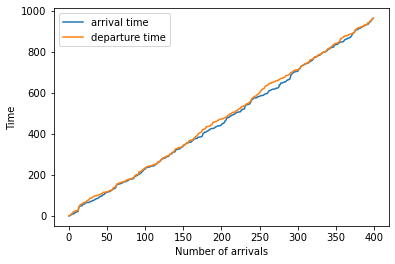

In [3]:
plt.plot(np.arange(total_arrivals), arrival_time, label = "arrival time")
plt.plot(np.arange(total_arrivals), departure_time, label = "departure time")
plt.legend()
plt.xlabel("Number of arrivals")
plt.ylabel("Time")

Calculate the mean queue size $E[Q]$.  
The theoretical mean queue size $$E[Q] = \frac{\rho}{1-\rho},$$ where $\rho = \frac{\lambda}{\mu}$

In [4]:
queue_size = np.zeros(2000)
for i in range(2000):
    point = np.random.uniform(0, departure_time[total_arrivals - 1])
    arrival_idx = np.searchsorted(arrival_time, point) - 1
    departure_idx = np.searchsorted(departure_time, point) - 1
    queue_size[i] = arrival_idx - departure_idx
print("E[Q] =", np.mean(queue_size))

E[Q] = 4.1075


Calculate the mean delay $E[D]$ (system waiting time) of a customer from the moment it arrives until its service is completed, and the mean delay of a customer $E[W_Q]$, in steady-state, from the moment it arrives until its service commences (waiting time in the queue).  
Theoretically, $$E[D] = \frac{1}{\mu - \lambda}$$
$$E[W_Q] = \frac{\rho}{\mu - \lambda}$$

In [5]:
delay = departure_time - arrival_time
wait = enter_time - arrival_time
mean_delay = np.mean(delay)
mean_wait = np.mean(wait)
print("E[D] =", mean_delay)
print("E[WQ] =", mean_wait)

E[D] = 10.021894569624575
E[WQ] = 8.073696025284878


In this case, $E\left\lbrack Q\right\rbrack=4$, $E\left\lbrack D\right\rbrack=10$, $E[W_Q]=8$.

The simulation results show that $E\left\lbrack Q\right\rbrack=4.1075$, $E\left\lbrack D\right\rbrack=10.021894569624575$, $E[W_Q]=8.073696025284878$.

**Little's Formula** tells that for a G/G/1 queueing model, $E\left\lbrack Q\right\rbrack=\lambda E\left\lbrack D\right\rbrack$.

The simulation result also proves that this equation makes sense.

## References
[1] https://www.youtube.com/watch?v=12XbrjiZ1FA  
[2] https://zh.wikipedia.org/zh-hans/M/M/1